## Feature Engineering 3

Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its
application.

Ans:   
Min-Max scaling, also known as Min-Max normalization, is a data preprocessing technique used to scale features to a specific range, typically [0, 1]. This process ensures that each feature contributes equally to the model, improving the performance of many machine learning algorithms that are sensitive to the scale of input data.  
  
How Min-Max Scaling Works:  
Min-Max scaling transforms each feature so that its values lie within a specified range. The formula used for Min-Max scaling is:  
  
$$
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$
  
Where:
- X is the original value of the feature.
- $X_{min}$ is the minimum value of the feature in the dataset.
- $X_{max}$ is the maximum value of the feature in the dataset.
- $X_{scaled}$ is the scaled value of the feature.

This formula shifts and scales the data so that the minimum value of the feature becomes 0 and the maximum value becomes 1.



In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Create a DataFrame with the example data
data = pd.DataFrame({
    'Age': [23, 45, 30, 35, 50]
})

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
data_scaled = scaler.fit_transform(data)

# Create a DataFrame with the scaled data for better visualization
data_scaled_df = pd.DataFrame(data_scaled, columns=['Age'])

print(f"Original Data:\n{data}")
print(f"Scaled Data:\n{data_scaled_df}")


Original Data:
   Age
0   23
1   45
2   30
3   35
4   50
Scaled Data:
        Age
0  0.000000
1  0.814815
2  0.259259
3  0.444444
4  1.000000


Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling?
Provide an example to illustrate its application.

Ans:  
The Unit Vector technique, also known as Vector Normalization or Normalization to Unit Norm, is a feature scaling method that scales the feature vectors so that they have a length (or norm) of 1. This technique is often used in machine learning to ensure that the features contribute equally to the model, especially when dealing with algorithms that use distances or dot products, such as k-Nearest Neighbors or Support Vector Machines.  
  
**Unit Vector Scaling (Normalization to Unit Norm):**  
Unit Vector Scaling transforms each feature vector to have a unit norm. The most common norm used is the L2 norm (Euclidean norm). For a feature vector 
𝑥 the L2 norm is calculated as:

$$
\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2}
$$

Where:
- $ \mathbf{x} = [x_1, x_2, \ldots, x_n]  $is the feature vector.
- $x_i $ represents each element of the vector.
- $\|\mathbf{x}\|_2 $ is the L2 norm of the vector $\mathbf{x}$.
   
The formula to scale a feature vector x to unit norm is:  

$$
\mathbf{x}_{\text{normalized}} = \frac{\mathbf{x}}{\|\mathbf{x}\|_2}
$$

Where:
- $\mathbf{x}$ is the original feature vector.
- $\|\mathbf{x}\|_2 $ is the L2 norm (Euclidean norm) of the vector \( \mathbf{x} \).
- $\mathbf{x}_{\text{normalized}} $ is the scaled feature vector with unit norm.
  
**Difference from Min-Max Scaling:**    
Min-Max Scaling:  

1. Transforms features to a specific range, typically [0, 1]
2. Scales individual feature values based on the minimum and maximum values of the feature.
3. Formula:
       $$
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$
   
Unit Vector Scaling:
  
1. Normalizes feature vectors to have a unit norm (length of 1).
2. Scales the entire feature vector based on its overall magnitude.
3. Formula: 
    $$\mathbf{x}_{\text{normalized}} = \frac{\mathbf{x}}{\|\mathbf{x}\|_2}$$

 

In [2]:
import numpy as np
from sklearn.preprocessing import normalize

# Define feature vectors
X = np.array([[3, 4], [1, 2]])

# Apply Unit Vector Normalization (L2 norm)
X_normalized = normalize(X, norm='l2')

print("Original Feature Vectors:\n", X)
print("\nNormalized Feature Vectors:\n", X_normalized)

Original Feature Vectors:
 [[3 4]
 [1 2]]

Normalized Feature Vectors:
 [[0.6        0.8       ]
 [0.4472136  0.89442719]]


Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an
example to illustrate its application.

Ans:  
**Principal Component Analysis (PCA)** is a statistical technique used for dimensionality reduction while preserving as much variance as possible in the data. PCA transforms the data into a new coordinate system where the axes (principal components) are orthogonal and ordered by the amount of variance they capture from the data.  
  
**How PCA Works**    
1. Standardization:  
PCA often starts with standardizing the features to have zero mean and unit variance, especially if the features have different scales.
2. Covariance Matrix Computation:  
Compute the covariance matrix of the features to understand the relationships between them.
3. Eigen Decomposition:  
Perform eigen decomposition on the covariance matrix to obtain eigenvalues and eigenvectors. The eigenvectors are the principal components, and the eigenvalues indicate the amount of variance captured by each principal component.  
4. Projection:  
Project the original data onto the principal components (eigenvectors) to obtain the reduced representation.  

**Benefits of PCA:**  
1. Dimensionality Reduction: Reduces the number of features while retaining most of the data’s variance.  
2. Noise Reduction: Helps in reducing noise and overfitting by eliminating less significant features.  
3. Data Visualization: Makes it easier to visualize high-dimensional data in 2D or 3D.  

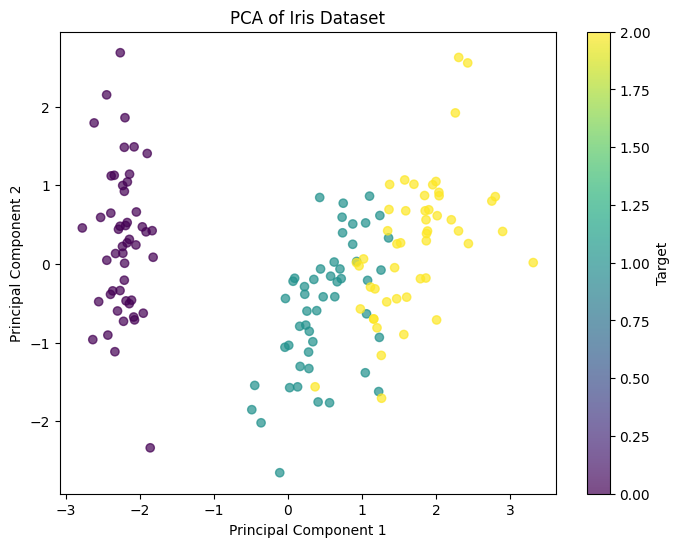

In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_standardized)

# Create a DataFrame for easier plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Target'] = y

# Plot the PCA results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Target'], cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(scatter, label='Target')
plt.show()

Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature
Extraction? Provide an example to illustrate this concept.

Ans:  
PCA and Feature Extraction: PCA is a method used for feature extraction by creating new features (principal components) that capture the most variance in the data.  
Dimensionality Reduction: By transforming the original features into a smaller set of principal components, PCA effectively reduces dimensionality while retaining the essential information.  
Application: In practice, PCA helps to simplify models, reduce computational costs, and visualize high-dimensional data by extracting meaningful features from the original dataset.  


Explained variance ratio of each component: [0.36198848 0.1920749 ]


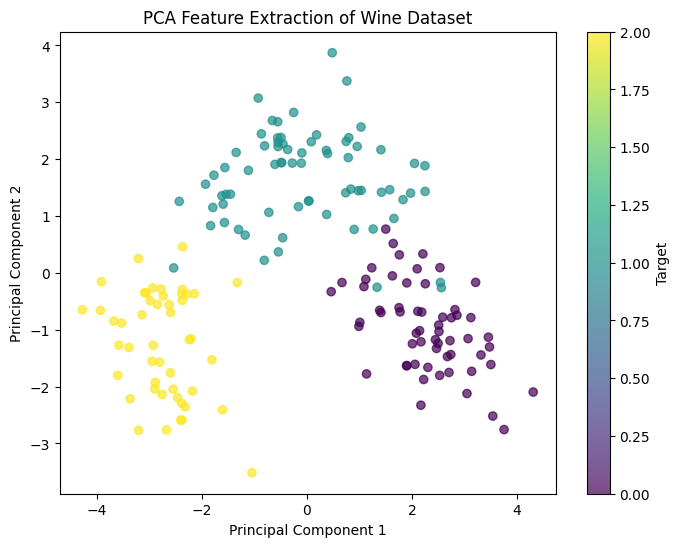

In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

# Load the Wine dataset
data = load_wine()
X = data.data
y = data.target
feature_names = data.feature_names

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA to extract features
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X_standardized)

# Create a DataFrame for easier visualization
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Target'] = y

# Print explained variance ratio
print("Explained variance ratio of each component:", pca.explained_variance_ratio_)

# Plot the PCA results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Target'], cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Feature Extraction of Wine Dataset')
plt.colorbar(scatter, label='Target')
plt.show()

Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset
contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to
preprocess the data.

Ans:  
To build a recommendation system for a food delivery service, you'll need to preprocess the dataset containing features like price, rating, and delivery time. Min-Max scaling is a common preprocessing technique to normalize these features, making them comparable and ensuring that each feature contributes equally to the model.  

**Why Use Min-Max Scaling?**
* Uniformity:  
Ensures all features are on a common scale, which helps in training machine learning models that are sensitive to the scale of input features.  
* Improved Model Performance:  
Helps improve the performance and convergence of gradient-based algorithms (e.g., logistic regression, neural networks) by putting all features on the same scale.  
* Avoid Bias:  
Prevents features with larger ranges from dominating the model's learning process.

Steps to perform Min-Max Scaler:  
1. Load and Inspect the Dataset  
2. Apply Min-Max Scaling:Use Min-Max scaling to normalize the features.  
3. Use the new scaled features to build the recommendation system.  


Q6. You are working on a project to build a model to predict stock prices. The dataset contains many
features, such as company financial data and market trends. Explain how you would use PCA to reduce the
dimensionality of the dataset.

Ans:  
When building a model to predict stock prices with a dataset containing many features, such as company financial data and market trends, Principal Component Analysis (PCA) can be a powerful tool for dimensionality reduction. PCA helps simplify the model by reducing the number of features while preserving the most important information. Here's a step-by-step explanation of how to use PCA for this purpose:  
  
**Steps to Use PCA for Dimensionality Reduction:**  
1. Load and Inspect the Dataset:Start by loading the dataset and inspecting the features to understand their nature and scale.  
2. Preprocess the Data:    
Standardization: Since PCA is sensitive to the scale of the features, standardize the data to have zero mean and unit variance. This ensures that each feature contributes equally to the PCA.  
3. Apply PCA:  
Use PCA to transform the data into a new set of features (principal components) that capture the maximum variance. You can choose the number of principal components based on the amount of variance you want to retain.    
4. Select Principal Components:  
Decide on the number of principal components to keep. This is often done by analyzing the explained variance ratio, which tells you how much variance each principal component explains.  
5. Transform the Data:  
Project the original data onto the selected principal components to obtain a reduced-dimensional representation.
6. Use Transformed Data:    
Use the reduced-dimensional data as input features for your predictive model. This can improve model performance by reducing overfitting and computational complexity.

Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the
values to a range of -1 to 1.

Ans:  
To perform Min-Max scaling for transforming a dataset to a range of [−1,1], you'll need to adjust the scaling formula slightly. The standard Min-Max scaling formula scales data to a range [0,1], but we can modify it to scale to [−1,1].
  
Modified Min-Max Scaling Formula To scale data to the range [−1,1], the formula is:  
  
$$
X_{\text{scaled}} = 2 \times \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} - 1
$$

Where:
- X is the original feature value.
- $X_{min}$ is the minimum value of the feature in the dataset.
- $X_{max}$ is the maximum value of the feature in the dataset.
- $X_{scaled}$ is the scaled feature value in the range [-1, 1].

In [5]:
import numpy as np

# Original data
data = np.array([1, 5, 10, 15, 20])

# Calculate min and max
X_min = np.min(data)
X_max = np.max(data)

# Apply Min-Max scaling to the range [-1, 1]
data_scaled = 2 * (data - X_min) / (X_max - X_min) - 1

print(f"Original Data: {data}")
print(f"Scaled Data to range [-1, 1]: {data_scaled}")

Original Data: [ 1  5 10 15 20]
Scaled Data to range [-1, 1]: [-1.         -0.57894737 -0.05263158  0.47368421  1.        ]


Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform
Feature Extraction using PCA. How many principal components would you choose to retain, and why?

Ans:  
Performing Feature Extraction using PCA (Principal Component Analysis) on a dataset with features such as [height, weight, age, gender, blood pressure] involves several steps. The goal is to reduce the dimensionality of the data while retaining as much of the variance (information) as possible. Here’s how you would approach it:  
  
Steps to Perform PCA:  
  
1. Load and Preprocess the Dataset:
Encode categorical features (e.g., gender) into numerical values if needed.  
Standardize the features to ensure they have zero mean and unit variance, which is important because PCA is sensitive to the scale of the features.  
  
2. Apply PCA:  
Fit PCA to the standardized data to transform it into principal components.  
  
3. Determine the Number of Principal Components to Retain:  
Use the explained variance ratio to decide how many principal components to keep. The goal is to retain enough components to explain a significant portion of the variance in the data.

Explained variance ratio of each principal component: [0.25968958 0.22939294 0.19072987 0.17999415 0.14019346]
Cumulative explained variance ratio: [0.25968958 0.48908251 0.67981239 0.85980654 1.        ]


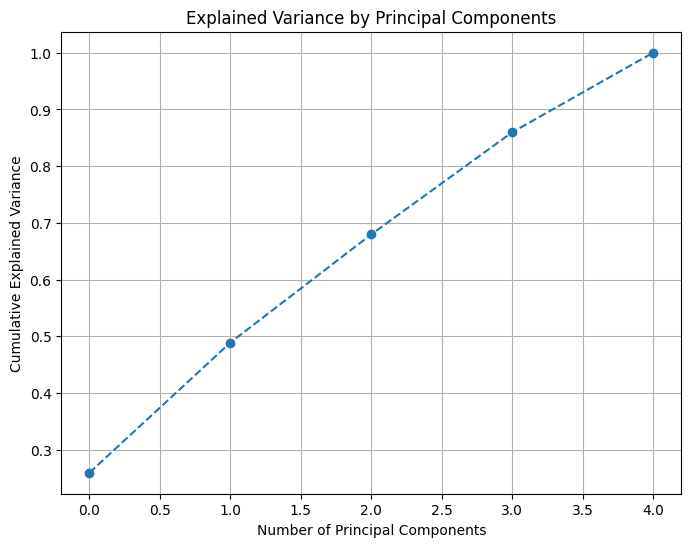

In [6]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Generate random dataset
n_samples = 100
data = {
    'height': np.random.uniform(150, 190, n_samples),      # Random heights between 150 and 190 cm
    'weight': np.random.uniform(50, 90, n_samples),        # Random weights between 50 and 90 kg
    'age': np.random.randint(20, 70, n_samples),           # Random ages between 20 and 70 years
    'gender': np.random.choice(['M', 'F'], n_samples),      # Random genders
    'blood_pressure': np.random.uniform(100, 160, n_samples) # Random blood pressure between 100 and 160
}

df = pd.DataFrame(data)

# Encode categorical features (e.g., gender)
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

# Separate features
X = df[['height', 'weight', 'age', 'gender', 'blood_pressure']]

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Print explained variance ratios
print("Explained variance ratio of each principal component:", explained_variance_ratio)
print("Cumulative explained variance ratio:", cumulative_explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()


Based on the Graph above, cumulattive explained variance is increasing as the principal components are increasing.  
Therefore we can use 3 or even 4 principal components. If we have size and memory constraints we can use 3 principal components as it already retains 85% to 87% of variance but if no constraints are available we can just use all 4 principal components as it has most cumulative explained variance of 100%.